In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.012, -87.0214 36...."


In [5]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


In [7]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

In [9]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [11]:
stops_by_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')

In [13]:
stops_by_zip

,stop,route,location,lat,lng,geometry,index_right,zip,po_name
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625),18,37189,WHITES CREEK
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.7809 36.14264),35,37203,NASHVILLE
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672 36.10562),17,37217,NASHVILLE
3,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609,POINT (-86.79561 36.13762),9,37212,NASHVILLE
4,COCKRILL ST & 14TH AVE N,ST. CECILIA - CUMBERLAND,"(36.175944, -86.804242)",36.175944,-86.804242,POINT (-86.80424 36.17594),40,37208,NASHVILLE
...,...,...,...,...,...,...,...,...,...
2519,RICHARD JONES RD & LONE OAK RD EB,BELMONT,"(36.104296, -86.809189)",36.104296,-86.809189,POINT (-86.80919 36.1043),44,37215,NASHVILLE
2520,WOODMONT BLVD & PLEASANT VALLEY RD WB,12TH AVENUE SOUTH,"(36.110228, -86.775619)",36.110228,-86.775619,POINT (-86.77562 36.11023),2,37204,NASHVILLE
2521,BUCHANAN ST & 11TH AVE N EB,BORDEAUX,"(36.180257, -86.804974)",36.180257,-86.804974,POINT (-86.80497 36.18026),40,37208,NASHVILLE
2522,MARINA ST & MYRTLE ST EB,McFERRIN,"(36.180416, -86.757368)",36.180416,-86.757368,POINT (-86.75737 36.18042),13,37206,NASHVILLE


In [15]:
stops_in_37221 = stops_by_zip.loc[stops_by_zip['zip'] == '37221']
stops_in_37221.shape

(45, 9)

In [17]:
polygon37221 = zipcodes.loc[zipcodes['zip'] == '37221']
polygon37221.shape

(1, 3)

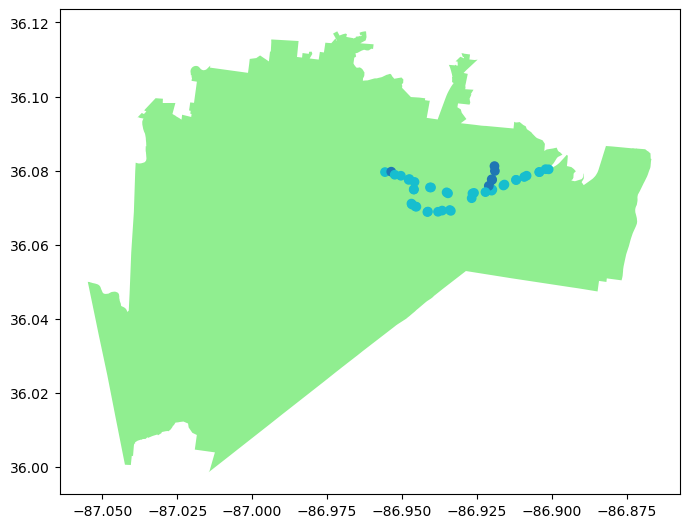

In [19]:
ax = polygon37221.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37221.plot( ax = ax, column = 'route');
plt.show();

In [29]:
polygon37221.geometry.centroid

C:\Users\sirli\AppData\Local\Temp\ipykernel_106608\2297672768.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37221.geometry.centroid


7    POINT (-86.97531 36.06283)
dtype: geometry

In [33]:
center = polygon37221.geometry.centroid[7]
print(center)

POINT (-86.97531387608755 36.06283153351842)


C:\Users\sirli\AppData\Local\Temp\ipykernel_106608\301489619.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37221.geometry.centroid[7]


In [35]:
area_center = [center.y, center.x]
print(area_center)

[36.06283153351842, -86.97531387608755]


In [37]:
map_37221 = folium.Map(location =  area_center, zoom_start = 12)
map_37221

In [39]:
i = 0
for row_index, row_values in stops_in_37221.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 18
values are:
 
stop                 HWY 70 S & HICKS RD WB
route                   WEST END - BELLEVUE
location            (36.073996, -86.925957)
lat                               36.073996
lng                              -86.925957
geometry       POINT (-86.925957 36.073996)
index_right                               7
zip                                   37221
po_name                           NASHVILLE
Name: 18, dtype: object
------------------------- 
index is 148
values are:
 
stop           HWY 70 S & SAWYER BROWN RD EB
route                    WEST END - BELLEVUE
location              (36.076953, -86.94581)
lat                                36.076953
lng                                -86.94581
geometry         POINT (-86.94581 36.076953)
index_right                                7
zip                                    37221
po_name                            NASHVILLE
Name: 148, dtype: object
------------------------- 
index is 176
values are:
 
stop           B

In [41]:
map_37221 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37221).add_to(map_37221)

for row_index, row_values in stops_in_37221.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37221)
map_37221.save('../maps/map37221.html')

map_37221